# Introduction

According to the article, 'The Internet’s history has just begun' (https://ourworldindata.org/internet)

The Internet’s history goes back some decades by now – email has been around since the 1960s, file sharing since at least the 1970s, and TCP/IP was standardized in 1982.

But it was the creation of the World Wide Web in 1989 that revolutionized our history of communication. The inventor of the World Wide Web was the British scientist Tim Berners-Lee who created a system to share information through a network of computers. At the time he was working for the European physics laboratory CERN in the Swiss Alps.

 By the year 2000 almost half of the population in the US was accessing information through the internet. But across most of the world, the internet had not yet had much influence – 93% in the East Asia and Pacific region and 99% in South Asia and in Sub-Saharan Africa were still offline in 2000. At the time of the Dot-com-crash less than 7% of the world was online.
 
 Fifteen years later, in 2016, three-quarters (76%) of people in the US were online and during these years countries from many parts of the world caught up: in Malaysia 79% used the internet; in Spain and Singapore 81%; in France 86%; in South Korea and Japan 93%; in Denmark and Norway 97%; and Iceland tops the ranking with 98% of the population online.
 
 And while many of us cannot imagine their lives without the services that the internet provides, the key message for me from this overview of the global history of the internet is that we are still in the very early stages of the internet. It was only in 2017 that half of the world population was online; and in 2018 it is therefore still the case that close to half of the world population is not using the internet
 
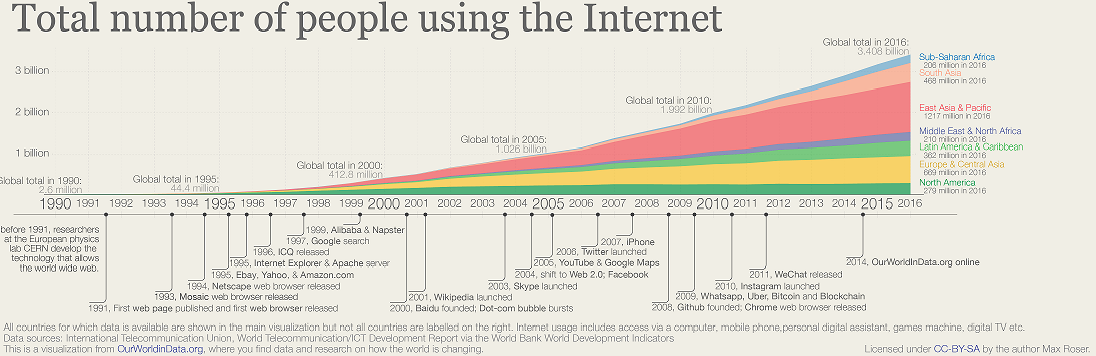

So I tried to find what drive and accelerate internet access ? 

reference: 'The Internet’s history has just begun' (https://ourworldindata.org/internet)

# Importing and data preproccessing

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/1-gb-internet-price/worldwide internet users - users.csv
/kaggle/input/1-gb-internet-price/worldwide internet speed in 2022  - avg speed.csv
/kaggle/input/1-gb-internet-price/worldwide internet prices in 2022 - IN 2022.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly_express as px

import warnings
warnings.filterwarnings('ignore')

import pycountry

In [3]:
df_user=pd.read_csv('/kaggle/input/1-gb-internet-price/worldwide internet users - users.csv')
df_speed=pd.read_csv('/kaggle/input/1-gb-internet-price/worldwide internet speed in 2022  - avg speed.csv')
df_price=pd.read_csv('/kaggle/input/1-gb-internet-price/worldwide internet prices in 2022 - IN 2022.csv')

Outline of three data frames

In [4]:
df_user.head()

,Country or area,Subregion,Region,Internet users,Population
0,China,Eastern Asia,Asia,"1,010,740,000","1,427,647,786"
1,India,Southern Asia,Asia,"833,710,000","1,352,642,280"
2,United States,Northern America,Americas,"312,320,000","327,096,265"
3,Indonesia,South-eastern Asia,Asia,"196,000,000","267,670,543"
4,Brazil,South America,Americas,"160,010,801","209,469,323"


In [5]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Country or area  214 non-null    object
 1   Subregion        214 non-null    object
 2   Region           214 non-null    object
 3   Internet users   214 non-null    object
 4   Population       212 non-null    object
dtypes: object(5)
memory usage: 8.5+ KB


In [6]:
df_speed.head()

,Country,Avg \n(Mbit/s)Ookla
0,Canada,75.18
1,South Korea,117.95
2,Netherlands,108.33
3,Japan,44.05
4,Norway,134.73


In [7]:
df_speed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             144 non-null    object 
 1   Avg 
(Mbit/s)Ookla  143 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.4+ KB


In [8]:
df_price.head()

,Country code,Name,Continental region,NO. OF Internet Plans,Average price of 1GB (USD),Cheapest 1GB for 30 days (USD),Most expensive 1GB (USD),Average price of 1GB (USD at the start of 2021),Average price of 1GB (USD – at start of 2020)
0,IL,Israel,NEAR EAST,27.0,$0.05,$0.02,$20.95,$0.11,$0.90
1,KG,Kyrgyzstan,CIS (FORMER USSR),20.0,$0.15,$0.10,$7.08,$0.21,$0.27
2,FJ,Fiji,OCEANIA,18.0,$0.19,$0.05,$0.85,$0.59,$3.57
3,IT,Italy,WESTERN EUROPE,29.0,$0.27,$0.09,$3.54,$0.43,$1.73
4,SD,Sudan,SUB-SAHARAN AFRICA,33.0,$0.27,$0.03,$0.92,$0.63,$0.68


In [9]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 9 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Country code                                      241 non-null    object 
 1   Name                                              242 non-null    object 
 2   Continental region                                242 non-null    object 
 3   NO. OF Internet Plans                             230 non-null    float64
 4   Average price of 1GB (USD)                        242 non-null    object 
 5   Cheapest 1GB for 30 days (USD)                    230 non-null    object 
 6   Most expensive 1GB (USD)                          230 non-null    object 
 7   Average price of 1GB (USD  at the start of 2021)  230 non-null    object 
 8   Average price of 1GB (USD – at start of 2020)     230 non-null    object 
dtypes: float64(1), object(

I tried to merge three df to one. And I also add new columns df['Average price 2021/2020'] and df['Internetuser%']

In [10]:
df_price['Average price of 1GB (USD)'] = df_price['Average price of 1GB (USD)'].str.replace('$', '', regex=False)
df_price['Cheapest 1GB for 30 days (USD)'] = df_price['Cheapest 1GB for 30 days (USD)'].str.replace('$', '', regex=False)
df_price['Most expensive 1GB (USD)'] = df_price['Most expensive 1GB (USD)'].str.replace('$', '', regex=False)
df_price['Average price of 1GB (USD  at the start of 2021)'] = df_price['Average price of 1GB (USD  at the start of 2021)'].str.replace('$', '', regex=False)
df_price['Average price of 1GB (USD – at start of 2020)'] = df_price['Average price of 1GB (USD – at start of 2020)'].str.replace('$', '', regex=False)
df_price = df_price.replace(['NO PACKAGES'], np.nan)

In [11]:
df_price=df_price.dropna()
df_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 224 entries, 0 to 229
Data columns (total 9 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Country code                                      224 non-null    object 
 1   Name                                              224 non-null    object 
 2   Continental region                                224 non-null    object 
 3   NO. OF Internet Plans                             224 non-null    float64
 4   Average price of 1GB (USD)                        224 non-null    object 
 5   Cheapest 1GB for 30 days (USD)                    224 non-null    object 
 6   Most expensive 1GB (USD)                          224 non-null    object 
 7   Average price of 1GB (USD  at the start of 2021)  224 non-null    object 
 8   Average price of 1GB (USD – at start of 2020)     224 non-null    object 
dtypes: float64(1), object(

In [12]:
df_price['Average price of 1GB (USD)'] = df_price['Average price of 1GB (USD)'].astype(float)
df_price['Cheapest 1GB for 30 days (USD)'] = df_price['Cheapest 1GB for 30 days (USD)'].astype(float)
df_price['Most expensive 1GB (USD)'] = df_price['Most expensive 1GB (USD)'].astype(float)
df_price['Average price of 1GB (USD  at the start of 2021)'] = df_price['Average price of 1GB (USD  at the start of 2021)'].astype(float)
df_price['Average price of 1GB (USD – at start of 2020)'] = df_price['Average price of 1GB (USD – at start of 2020)'].astype(float)

In [13]:
df_user['Internet users'] = df_user['Internet users'].str.replace(',', '', regex=False)
df_user['Population'] = df_user['Population'].str.replace(',', '', regex=False)
df_user['Internet users']=df_user['Internet users'].astype(float)
df_user['Population']=df_user['Population'].astype(float)
df_speed['Avg \n(Mbit/s)Ookla']=df_speed['Avg \n(Mbit/s)Ookla'].astype(float)

In [14]:
df=pd.merge(df_price, df_user, left_on='Name', right_on="Country or area", how='left')

In [15]:
df=pd.merge(df, df_speed, left_on='Name', right_on="Country", how='left')

In [16]:
df=df.drop(['Continental region', 'Country or area','Country'], axis=1)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225 entries, 0 to 224
Data columns (total 13 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Country code                                      225 non-null    object 
 1   Name                                              225 non-null    object 
 2   NO. OF Internet Plans                             225 non-null    float64
 3   Average price of 1GB (USD)                        225 non-null    float64
 4   Cheapest 1GB for 30 days (USD)                    225 non-null    float64
 5   Most expensive 1GB (USD)                          225 non-null    float64
 6   Average price of 1GB (USD  at the start of 2021)  225 non-null    float64
 7   Average price of 1GB (USD – at start of 2020)     225 non-null    float64
 8   Subregion                                         188 non-null    object 
 9   Region               

In [18]:
df['Average price 2021/2020']=df['Average price of 1GB (USD  at the start of 2021)']/df['Average price of 1GB (USD – at start of 2020)']*100
df['Internet user%']=df['Internet users']/df['Population']*100

In [19]:
df.head()

,Country code,Name,NO. OF Internet Plans,Average price of 1GB (USD),Cheapest 1GB for 30 days (USD),Most expensive 1GB (USD),Average price of 1GB (USD at the start of 2021),Average price of 1GB (USD – at start of 2020),Subregion,Region,Internet users,Population,Avg \n(Mbit/s)Ookla,Average price 2021/2020,Internet user%
0,IL,Israel,27.0,0.05,0.02,20.95,0.11,0.90,Western Asia,Asia,6788737.0,8381516.0,28.01,12.222222,80.996529
1,KG,Kyrgyzstan,20.0,0.15,0.10,7.08,0.21,0.27,Central Asia,Asia,2309235.0,6304030.0,16.30,77.777778,36.631092
2,FJ,Fiji,18.0,0.19,0.05,0.85,0.59,3.57,Melanesia,Oceania,452479.0,883483.0,25.99,16.526611,51.215360
3,IT,Italy,29.0,0.27,0.09,3.54,0.43,1.73,Southern Europe,Europe,50540000.0,60627291.0,37.15,24.855491,83.361798
4,SD,Sudan,33.0,0.27,0.03,0.92,0.63,0.68,Northern Africa,Africa,12512639.0,41801533.0,9.50,92.647059,29.933445


# Correlation analysis

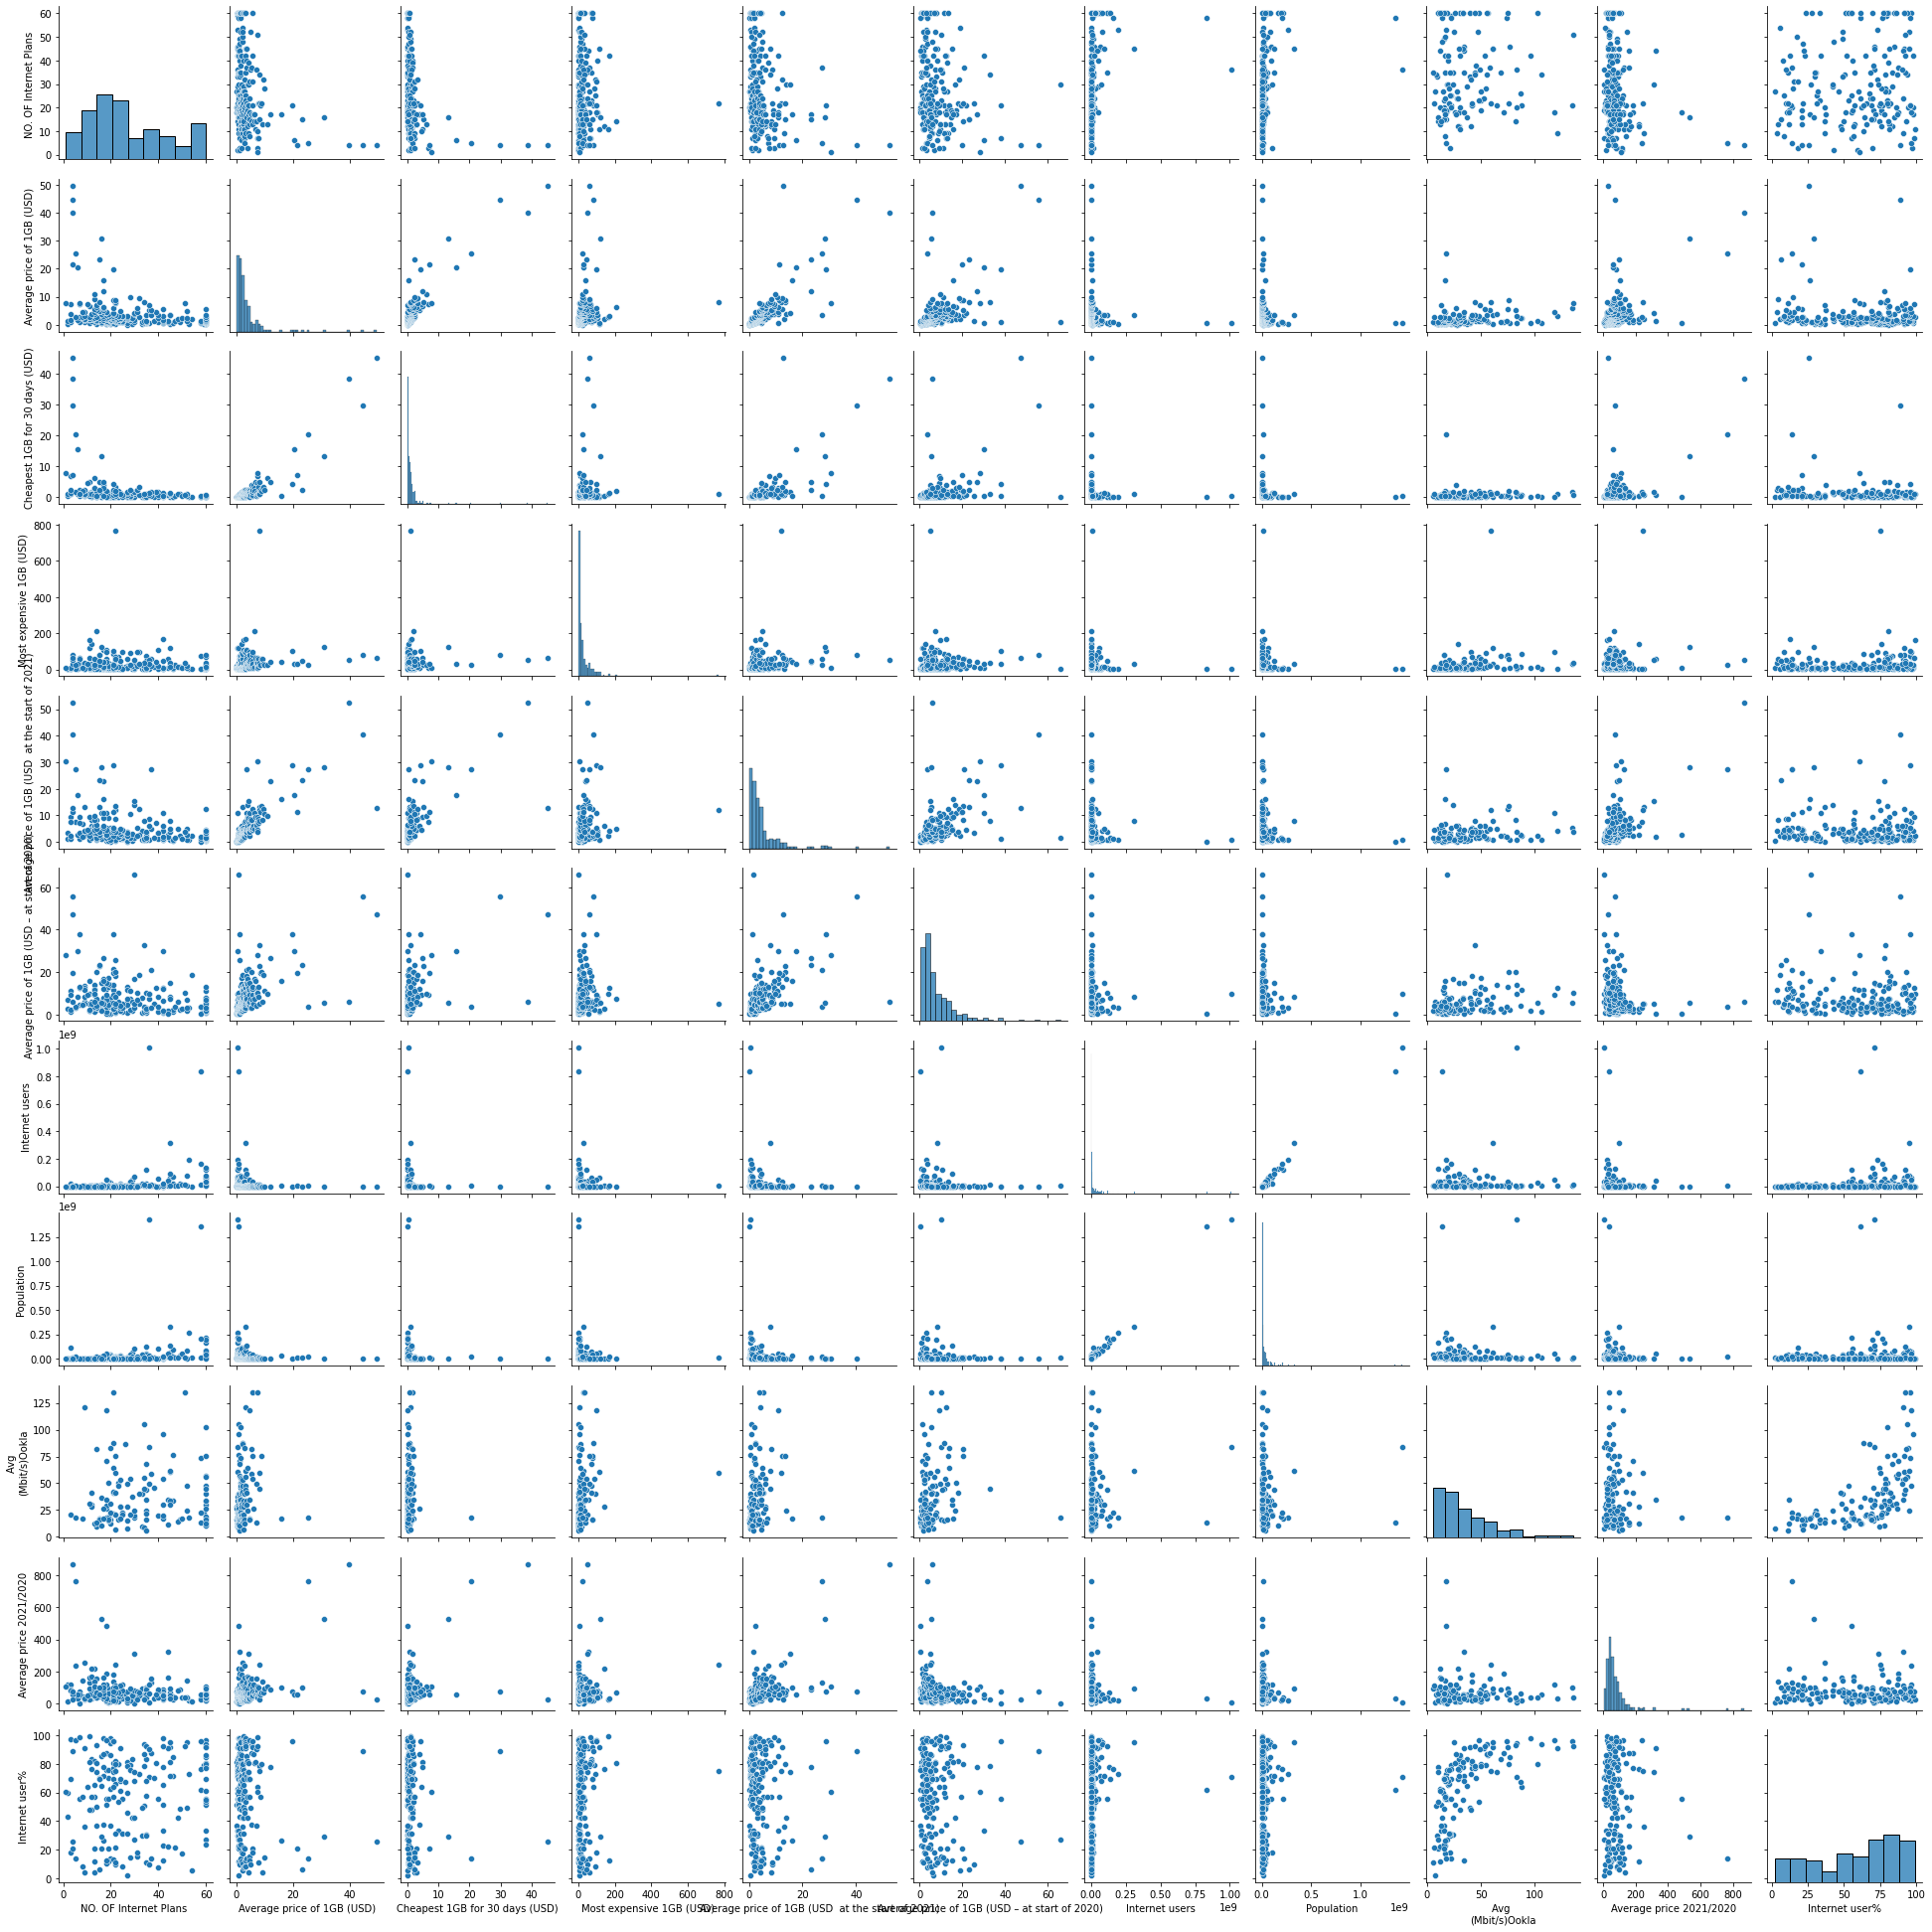

In [20]:
sns.pairplot(df)

<AxesSubplot:>

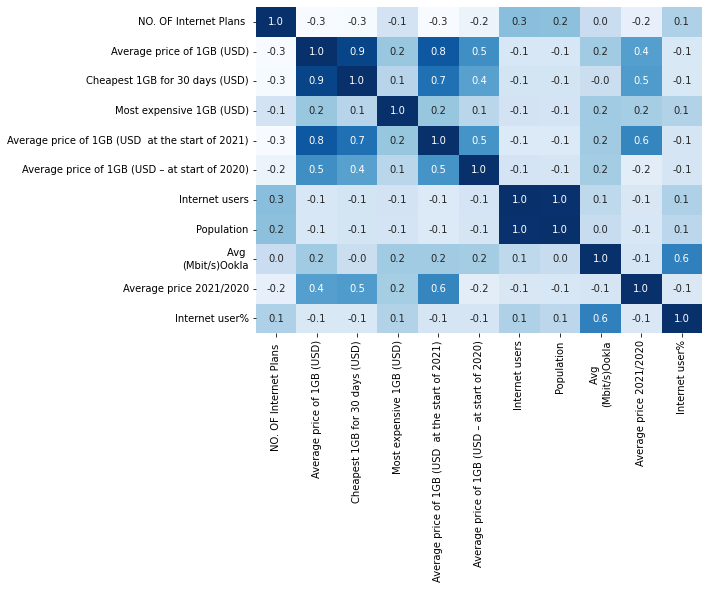

In [21]:
plt.figure(figsize = (8,6))
sns.heatmap(df.corr(),annot=True, cbar=False, cmap='Blues', fmt='.1f')

* Internet user% has positive correlation with Ave Mbit(speed):0.6
* Internet user% has very weak correlation with Population:0.1
* Internet user% has very weak correlation with Price:0.1 to -0.1

This may show that 'technology to make internet faster' can drive and accelerate inernet access.

# Internet user% analysis

In [22]:
df['Internet user%'].describe()

count    187.000000
mean      58.626235
std       28.296579
min        1.964596
25%       33.516627
50%       65.372785
75%       80.717366
max       99.175207
Name: Internet user%, dtype: float64

* Boxplot

<AxesSubplot:ylabel='Internet user%'>

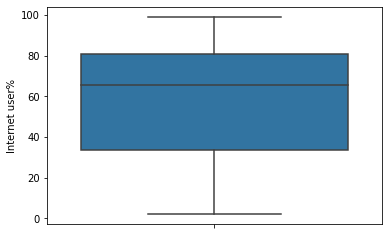

In [23]:
sns.boxplot(y="Internet user%",data=df)

* Top 30 countries

<AxesSubplot:xlabel='Name'>

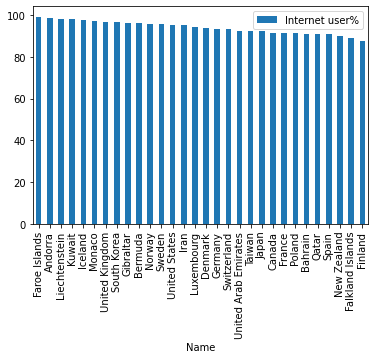

In [24]:
df.sort_values(by="Internet user%",ascending=False).head(30).plot.bar(y='Internet user%',x='Name')

* Countries whose internet user% is below average (58,6%)

<AxesSubplot:ylabel='Name'>

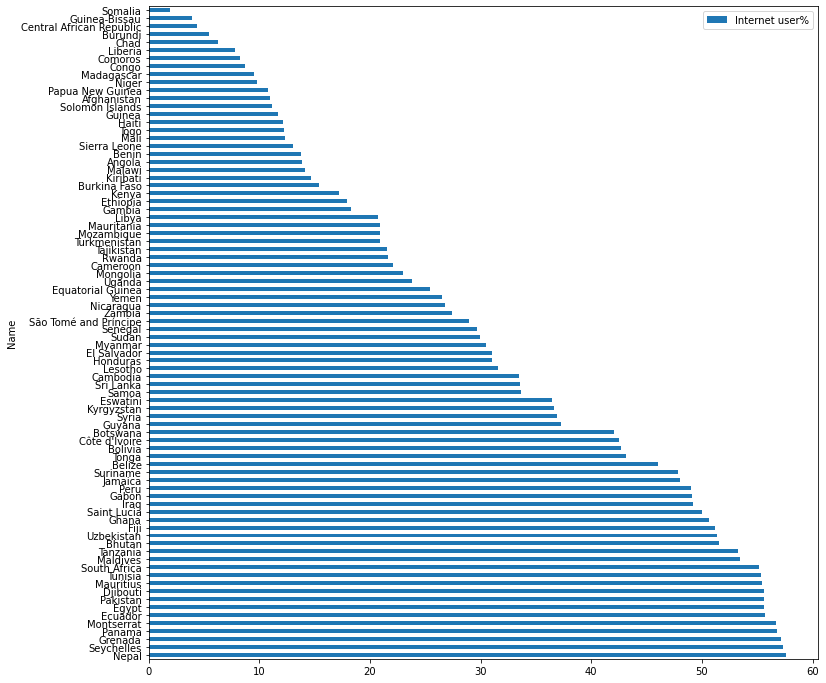

In [25]:
df[(df['Internet user%']>0)&(df['Internet user%']<58.6)].sort_values(by="Internet user%",
                                                                   ascending=False).plot.barh(y='Internet user%',
                                                                                              x='Name',figsize=(12,12))

In [26]:
fig = px.choropleth(df[(df['Internet user%']>0)&(df['Internet user%']<58.6)],locations='Name',color='Internet user%',scope='world',
                    locationmode='country names', 
                    range_color=(0,50),
                    title='Countries below average of Internet user%',height=800)
fig.show()

There are a lot of countries whose internet user% is below average in africa and central asia.

# Internet speed analysis

In [27]:
df["Avg \n(Mbit/s)Ookla"].describe()

count    130.000000
mean      37.030692
std       27.644528
min        5.500000
25%       16.955000
50%       28.190000
75%       49.142500
max      135.350000
Name: Avg \n(Mbit/s)Ookla, dtype: float64

* Boxplot

<AxesSubplot:ylabel='Avg \n(Mbit/s)Ookla'>

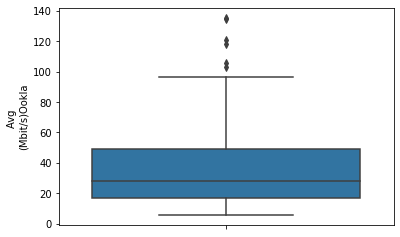

In [28]:
sns.boxplot(y="Avg \n(Mbit/s)Ookla",data=df)

* Top 30 countries

<AxesSubplot:xlabel='Name'>

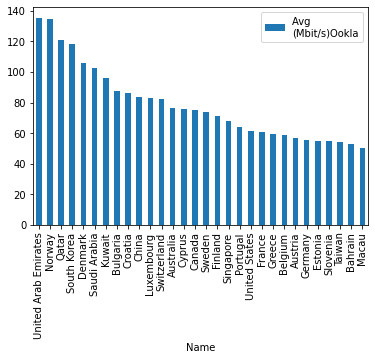

In [29]:
df.sort_values(by="Avg \n(Mbit/s)Ookla",ascending=False).head(30).plot.bar(y='Avg \n(Mbit/s)Ookla',x='Name')

* Countries whose internet speed is below average (37Mbit/s)

<AxesSubplot:ylabel='Name'>

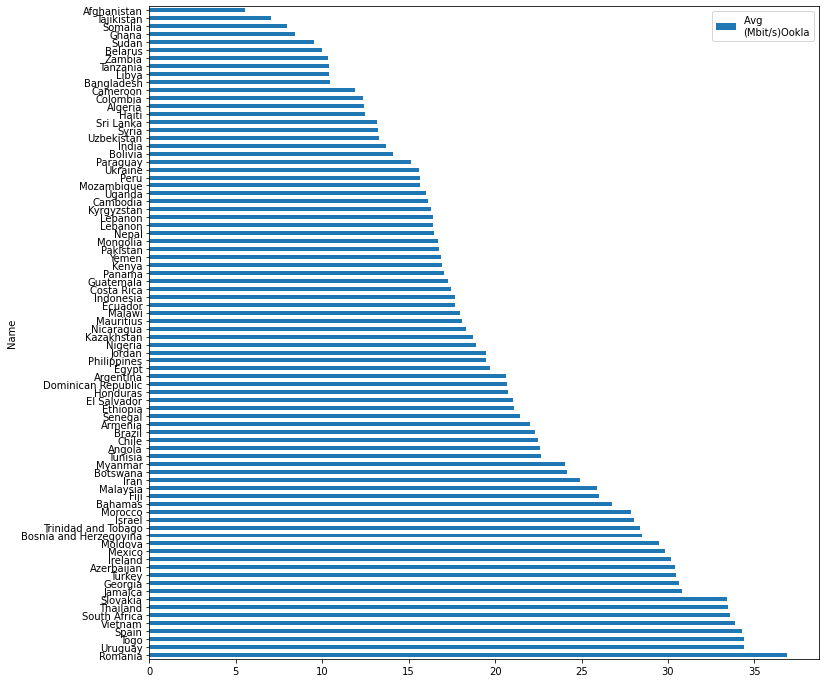

In [30]:
df[df['Avg \n(Mbit/s)Ookla']<37].sort_values(by="Avg \n(Mbit/s)Ookla",
                                                                   ascending=False).plot.barh(y='Avg \n(Mbit/s)Ookla',
                                                                                              x='Name',figsize=(12,12))

In [31]:
fig = px.choropleth(df[df['Avg \n(Mbit/s)Ookla']<37],locations='Name',color='Avg \n(Mbit/s)Ookla',scope='world',
                    locationmode='country names', 
                    range_color=(0,40),
                    title='Countries whose internet speed is below average',height=800)
fig.show()

There are a lot of countries whose internet speed is below average in africa, east and south asia, central asia and south america.

# Clustering

In [32]:
pip install pycaret --ignore-installed llvmlite numba

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.2/320.2 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 35.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.6/636.6 kB 36.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 54.3 MB/s eta 0:00:00
  Installing build dependencies ... - \ | / - done
  Getting requirements to build wheel ... - done
  Installing backend dependencies ... - \ | done
  Preparing metadata (pyproject.toml) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.9/25.9 MB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 654.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.2/125.2 kB 8.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━

In [33]:
conda install -c numba llvmlite

Solving environment: \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | done

## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - llvmlite


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    llvmlite-0.38.0            |   py37he1b5a44_0        28.2 MB  numba
    openssl-1.1.1q             |       h166bdaf_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:        30.3 MB

The following packages will be UPDATED:

  openssl                                 1.1.1o-

In [34]:
pip install numba --upgrade

  Using cached numba-0.55.2-cp37-cp37m-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (3.3 MB)
  Attempting uninstall: numba
    Found existing installation: numba 0.55.1
    Uninstalling numba-0.55.1:
      Successfully uninstalled numba-0.55.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pycaret 2.3.10 requires gensim<4.0.0, but you have gensim 4.0.1 which is incompatible.
pycaret 2.3.10 requires imbalanced-learn==0.7.0, but you have imbalanced-learn 0.9.0 which is incompatible.
pycaret 2.3.10 requires numba<0.55, but you have numba 0.55.2 which is incompatible.
pycaret 2.3.10 requires pyyaml<6.0.0, but you have pyyaml 6.0 which is incompatible.
pycaret 2.3.10 requires scikit-learn==0.23.2, but you have scikit-learn 1.0.2 which is incompatible.
pycaret 2.3.10 requires scipy<=1.5.4, but you have scipy 1.7.3 which is incompatible.
Note: you may need to resta

In [35]:
from pycaret.clustering import *

In [36]:
exp_clust = setup(df, normalize = True,session_id = 123,silent=True)

,Description,Value
0,session_id,123
1,Original Data,"(225, 15)"
2,Missing Values,True
3,Numeric Features,11
4,Categorical Features,4
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(225, 486)"
9,CPU Jobs,-1


In [37]:
kmeans = create_model('kmeans',num_clusters = 4)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1195,39.9421,1.6762,0,0,0


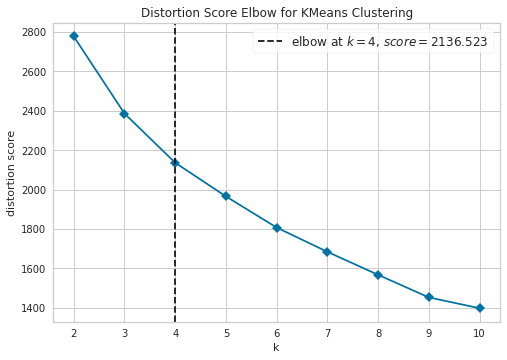

In [38]:
plot_model(kmeans, plot = 'elbow')

In [39]:
kmean_results = assign_model(kmeans)

In [40]:
pd.set_option('display.max_rows',250)

In [41]:
kmean_results.groupby('Cluster').mean().T

Cluster,Cluster 0,Cluster 1,Cluster 2,Cluster 3
NO. OF Internet Plans,2.070079e+01,3.650549e+01,4.700000e+01,6.600000e+00
Average price of 1GB (USD),3.693780e+00,2.434066e+00,6.000000e-01,3.810600e+01
Cheapest 1GB for 30 days (USD),1.427087e+00,5.359341e-01,1.750000e-01,2.941600e+01
Most expensive 1GB (USD),2.322984e+01,3.806418e+01,1.970000e+00,6.880200e+01
Average price of 1GB (USD at the start of 2021),5.294016e+00,3.197253e+00,3.500000e-01,3.227200e+01
Average price of 1GB (USD – at start of 2020),9.200945e+00,5.895824e+00,5.075000e+00,2.356400e+01
Internet users,4.080088e+06,2.862510e+07,9.222250e+08,7.407010e+05
Population,1.282472e+07,3.726195e+07,1.390145e+09,4.916614e+06
Avg \n(Mbit/s)Ookla,1.989560e+01,4.810597e+01,4.855000e+01,1.795000e+01
Average price 2021/2020,7.288440e+01,6.635706e+01,2.039162e+01,4.525479e+02


In [42]:
plot_model(kmeans, plot = 'distribution')

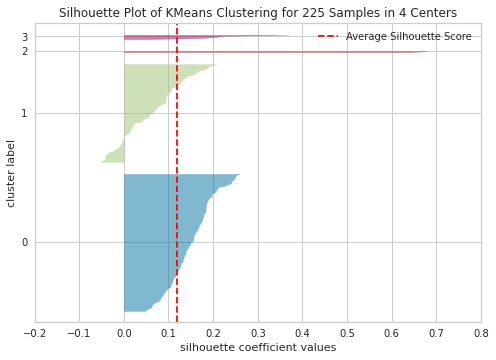

In [43]:
plot_model(kmeans, plot = 'silhouette')

In [44]:
plot_model(kmeans)

In [45]:
plot_model(kmeans, plot = 'tsne')

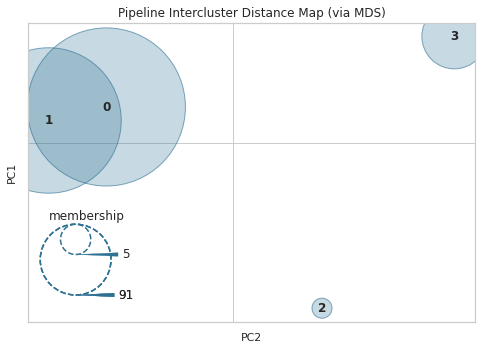

In [46]:
plot_model(kmeans, plot = 'distance')

In [47]:
plot_model(kmeans, plot = 'distribution', feature = 'Average price of 1GB (USD)')

In [48]:
plot_model(kmeans, plot = 'distribution', feature = 'Internet users')

In [49]:
plot_model(kmeans, plot = 'distribution', feature = 'Population')

In [50]:
plot_model(kmeans, plot = 'distribution', feature = 'Internet user%')

In [51]:
plot_model(kmeans, plot = 'distribution', feature = 'Avg \n(Mbit/s)Ookla')

In [52]:
kmean_results.groupby('Cluster')['Cluster'].count()

Cluster
Cluster 0    127
Cluster 1     91
Cluster 2      2
Cluster 3      5
Name: Cluster, dtype: int64

By clustering, we can categorize to 4 groups. And PCA1 is cost and PCA2 is number of user. As next step, I tried to find which cluster have potential for internet access, which means countries whose internet user% is below average and ratio of countries whose internet speed is below average.

In [53]:
kmean_results[(kmean_results['Internet user%']>0)&(kmean_results['Internet user%']<58.6)&(kmean_results['Avg \n(Mbit/s)Ookla']<37)].groupby('Cluster')['Cluster'].count()

Cluster
Cluster 0    34
Cluster 1     7
Cluster 3     1
Name: Cluster, dtype: int64

In each clusters, ratio of countries whose internet user% is below average and ration of countries whose internet speed is below average are
* Cluster 0 : 27%
* Cluster 1 :  8%
* Cluster 2 :  0%
* Cluster 3 : 20%

Top 10 potential countries whose internet user% is below average and ration of countries whose internet speed is below average

<AxesSubplot:ylabel='Name'>

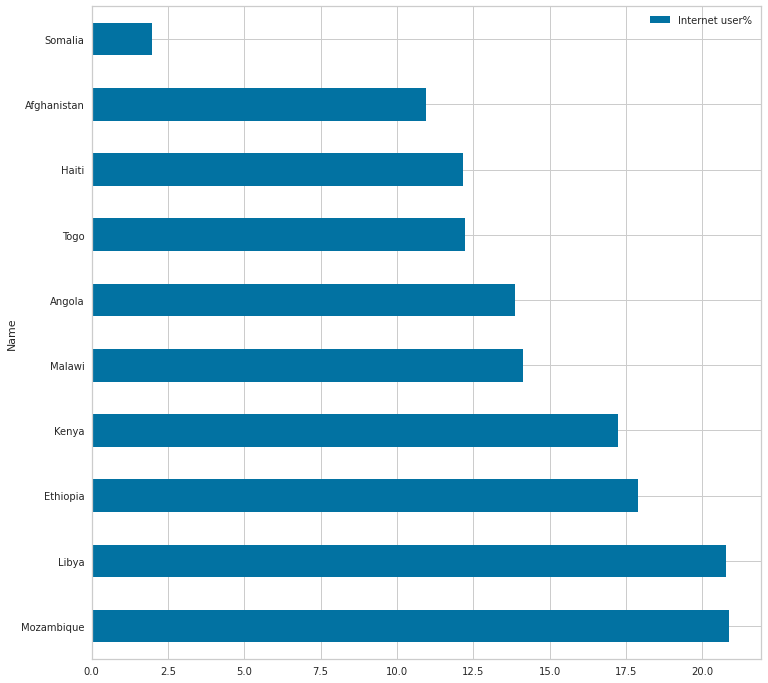

In [54]:
kmean_results[(kmean_results['Internet user%']>0)&(kmean_results['Internet user%']<58.6)&(kmean_results['Avg \n(Mbit/s)Ookla']<37)].sort_values(by="Internet user%",
                                                                   ascending=False).tail(10).plot.barh(y='Internet user%',
                                                                                              x='Name',figsize=(12,12))

# Case Studies of Somalia and Afghanistan

Somalia

Accordint to 'DATAREPORTAL'( https://datareportal.com/reports/digital-2022-somalia )

Internet connection speeds in Somalia in 2022
Data published by Ookla indicate that internet users in Somalia could have expected the following internet connection speeds at the start of 2022:
* Median mobile internet connection speed via cellular networks: 10.94 Mbps.
* Median fixed internet connection speed: 5.55 Mbps.

Ookla’s data reveals that the median mobile internet connection speed in Somalia increased by 5.77 Mbps (+112 percent) in the twelve months to the start of 2022.

Meanwhile, Ookla’s data shows that fixed internet connection speeds in Somalia increased by 0.65 Mbps (+13.3 percent) during the same period.

GSMA Intelligence’s numbers indicate that mobile connections in Somalia were equivalent to 46.2 percent of the total population in January 2022.

The number of mobile connections in Somalia increased by 373 thousand (+5.1 percent) between 2021 and 2022.

Afghanistan

Accordint to 'DATAREPORTAL'( https://datareportal.com/reports/digital-2022-afghanistan )

Data published by Ookla indicate that internet users in Afghanistan could have expected the following internet connection speeds at the start of 2022:
* Median mobile internet connection speed via cellular networks: 5.24 Mbps.
* Median fixed internet connection speed: 1.67 Mbps.

Ookla’s data reveals that the median mobile internet connection speed in Afghanistan increased by 1.28 Mbps (+32.3 percent) in the twelve months to the start of 2022.

Meanwhile, Ookla’s data shows that fixed internet connection speeds in Afghanistan decreased by 0.42 Mbps (-20.1 percent) during the same period.

GSMA Intelligence’s numbers indicate that mobile connections in Afghanistan were equivalent to 68.2 percent of the total population in January 2022.

The number of mobile connections in Afghanistan increased by 1.2 million (+4.6 percent) between 2021 and 2022.

# Insight

Considering both countries, Somalia and Afghanistan, mobile internet connection speed has been improved. But fixed internet connection has not been improved well.　As mobile population has been increasing and there are still some potential, how can they make mobile internet connection faster and more convenient is one of key factor.